<a href="https://colab.research.google.com/github/pradipNP/Bi-directional-BFS/blob/main/bidirectional_bfs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

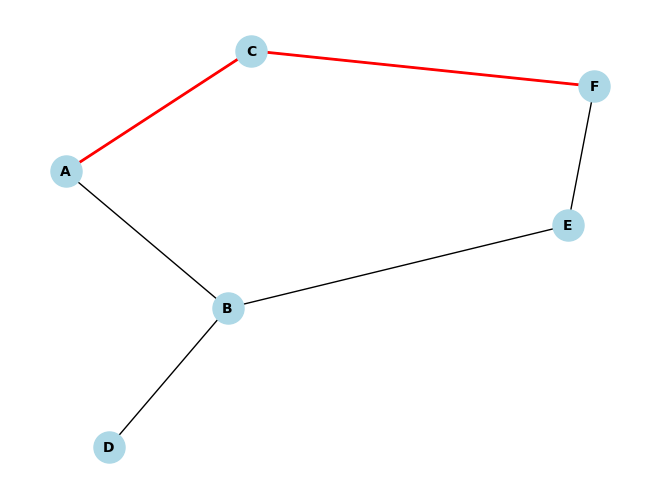

In [ ]:

from collections import deque

def bi_directional_bfs(graph, start, goal):
    if start == goal:
        return [start]

    # Initialize front and back queues
    front_queue = deque([start])
    back_queue = deque([goal])

    # Track visited nodes for both searches
    front_visited = {start: None}
    back_visited = {goal: None}

    def intersect_node():
        for node in front_visited:
            if node in back_visited:
                return node
        return None

    while front_queue and back_queue:
        # Expand from the front (start side)
        front_current = front_queue.popleft()
        for neighbor in graph[front_current]:
            if neighbor not in front_visited:
                front_queue.append(neighbor)
                front_visited[neighbor] = front_current
            if neighbor in back_visited:
                intersection = neighbor
                return reconstruct_path(intersection, front_visited, back_visited)

        # Expand from the back (goal side)
        back_current = back_queue.popleft()
        for neighbor in graph[back_current]:
            if neighbor not in back_visited:
                back_queue.append(neighbor)
                back_visited[neighbor] = back_current
            if neighbor in front_visited:
                intersection = neighbor
                return reconstruct_path(intersection, front_visited, back_visited)

    return None

def reconstruct_path(intersection, front_visited, back_visited):
    # Reconstruct path from start to goal
    path = []

    # Traverse forward from the intersection
    current = intersection
    while current is not None:
        path.append(current)
        current = front_visited[current]
    path.reverse()

    # Traverse backward from the intersection
    current = back_visited[intersection]
    while current is not None:
        path.append(current)
        current = back_visited[current]

    return path


#Compare Performance: Bi-Directional BFS vs. BFS vs. DFS

def bfs(graph, start, goal):
    queue = deque([start])
    visited = {start: None}

    while queue:
        current = queue.popleft()

        if current == goal:
            return reconstruct_path(current, visited)

        for neighbor in graph[current]:
            if neighbor not in visited:
                visited[neighbor] = current
                queue.append(neighbor)

    return None

#DFS Implementation:

def dfs(graph, start, goal):
    stack = [start]
    visited = {start: None}

    while stack:
        current = stack.pop()

        if current == goal:
            return reconstruct_path(current, visited)

        for neighbor in graph[current]:
            if neighbor not in visited:
                visited[neighbor] = current
                stack.append(neighbor)

    return None

#Visualization of the Search Process:

import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(graph, path=None):
    G = nx.Graph()

    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    pos = nx.spring_layout(G)

    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')

    # Highlight the path if provided
    if path:
        path_edges = [(path[i], path[i+1]) for i in range(len(path) - 1)]
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2)

    plt.show()

# Example graph representation
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

path = bi_directional_bfs(graph, 'A', 'F')
visualize_graph(graph, path)

# New Section